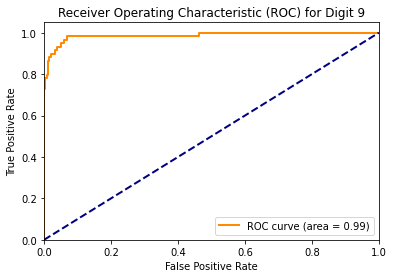

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = load_digits()

# Convert to a binary classification problem - '9' or not '9'
X = digits.data
y = (digits.target == 9).astype(int)  # 1 for digit '9', 0 for others

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=10000, solver='liblinear')  # Using liblinear solver for binary classification
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_scores = model.predict_proba(X_test)[:, 1]  # Probability estimates for the class '9'

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Digit 9')
plt.legend(loc="lower right")
plt.show()



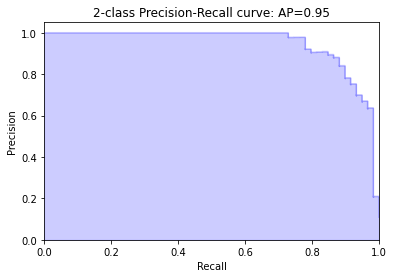

In [3]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_scores = model.predict_proba(X_test)[:, 1]  # Probability estimates for the class '9'

# Compute Precision-Recall curve and average precision
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plotting the Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
plt.show()
